<a id='top'></a>
# Wrangling Open Street Map Data 
***

**Source codes of function used for this report are in [wrangling.py]() **
## Contents

  *** Chapter 1. [Map Area](#ch1) ***
  
   *** Chapter 2. [Problem Encountered](#ch2) ***

   * [Tag names](#section1)
   * [Street](#section2)
   * [Phone Number & Fax Number](#section3)
   * [Post Code](#section4)
   * [Date](#section5)
   * [Height](#section6)
   * [Is_In](#section7)
   * [Web](#section8)


*** Chpater 3. [Data Overview](#ch3) ***

*** Chapter 4. [Data Exploration](#ch4) ***


----

<a id='ch1'></a>
## Chapter1. Map Area 
I choose map of [Vancovuer, British Columbia](https://mapzen.com/data/metro-extracts/metro/vancouver_canada/)where i have stayed for a year. I often went around the city with google map so i know area well. I really want to look into data from this city.

#### Import modules & Data

In [36]:
from wrangling import *
import os
import pprint

source = ('/Users/watseob/Desktop/DataScience/Data/vancouver_canada.osm')

#### Size of file
   First, Let's check size of file.

In [2]:
print count_tags(source)
print ""
print "Size of file : {} MB".format(os.stat(source).st_size/1024**2)

{'node': 779122, 'nd': 968463, 'bounds': 1, 'member': 7932, 'tag': 257236, 'osm': 1, 'way': 152084, 'relation': 885}

Size of file : 168 MB


---

<a id='ch2'></a>
## Chapter2. Problem Encountered
<a id='section1'></a>


### 1. Tag Names
**Problems**
    * There are names of tag which are nested with different capital letter.
          'Category', 'FIXME', 'Note', 'Note2', 'Phone', 'Website'

**Cleaning**
    * Update tags names 
        Category => category
        Website => website
        FIXME => fixme
        Note2 => note2
        Note => note
        Phone => phone
      
#### Count tags

In [3]:
count_tags(source)

{'bounds': 1,
 'member': 7932,
 'nd': 968463,
 'node': 779122,
 'osm': 1,
 'relation': 885,
 'tag': 257236,
 'way': 152084}

In [4]:
process_map(source)

{'lower': 229051, 'lower_colon': 25260, 'other': 2924, 'problemchars': 1}

In [5]:
bad_tag_list = audit_tag(source,False)

set(['Category', 'FIXME', 'Note', 'Note2', 'Phone', 'Website'])


In [6]:
for tag in bad_tag_list :
    update_tag(tag)

Category => category
Website => website
FIXME => fixme
Note2 => note2
Note => note
Phone => phone


<a id='section2'></a>
### 2. Street names
**Problems **
    * Abbreviations
        ave,Blvd,E, St. and etc.
    * House number in street names
        #108 , #201, #328, #701
    * Wrong name
        steet (must be street)
**Cleaning**
    * I cleaned those names which i didn't expect.
    * I erased house numbers
    * I updated abbreviated names
    * Some of names have two Abbreviations
        8th Ave W (updated those type of name with recursive function)

#### Count type of street

In [7]:
count_street(source)

#108: 2
#203: 1
#216: 1
#328: 1
#701: 1
2nd: 1
Alley: 5
Ave: 2
Avenue: 1350
Blvd: 1
Boulevard: 27
Broadway: 198
Broughton: 1
Connector: 1
Court: 7
Crescent: 15
Denmanstreet: 1
Drive: 246
E: 1
East: 31
Esplanade: 1
Highway: 8
Jarvis: 1
Jervis: 2
Kingsway: 97
Lane: 24
Mall: 51
Mews: 10
Nanaimo: 1
Parkway: 2
Place: 41
Rd.: 1
Road: 243
South: 2
Square: 2
St: 31
St.: 2
Steet: 1
street: 1
Street: 5762
Street : 1
Terminal: 1
Vancouver: 2
Venue: 1
W: 1
Walk: 1
Way: 52
West: 27


#### Audit street

In [8]:
st_types, mapping = audit_street(source)
pprint.pprint(dict(st_types))

{'#108': set(['8th Ave W #108']),
 '#203': set(['Fir Street #203']),
 '#216': set(['Granville St #216']),
 '#328': set(['Granville St #328']),
 '#701': set(['Comox St #701']),
 '2nd': set(['East 2nd']),
 'Ave': set(['West 3rd Ave', 'West 41st Ave']),
 'Blvd': set(['University Blvd']),
 'Denmanstreet': set(['Denmanstreet']),
 'E': set(['37th Ave E']),
 'Rd.': set(['Boundary Rd.']),
 'St': set(['Arbutus St',
            'Beatty St',
            'East Pender St',
            'Main St',
            'Nicola St',
            'Powell St',
            'Robson St',
            'Shaughnessy St',
            'W Cordova St',
            'Whitchurch St',
            'Yew St']),
 'St.': set(['Mainland St.', 'Seymour St.']),
 'Steet': set(['West Hastings Steet']),
 'Street ': set(['Richards Street ']),
 'Vancouver': set(['Howe St. Vancouver', 'W. Hastings St. Vancouver']),
 'Venue': set(['Greer Venue']),
 'W': set(['Broadway W']),
 'street': set(['Main street'])}


#### Update street

In [9]:
for st_type, ways in st_types.iteritems():
    for street in ways:
        updated_street = update_street(street, mapping)
        print street, "=>", updated_street

37th Ave E => 37th Ave East
Granville St #328 => Granville Street 
Mainland St. => Mainland Street
Seymour St. => Seymour Street
Comox St #701 => Comox Street 
Greer Venue => Greer Avenue
Granville St #216 => Granville Street 
Nicola St => Nicola Street
Beatty St => Beatty Street
East Pender St => East Pender Street
Robson St => Robson Street
Yew St => Yew Street
Arbutus St => Arbutus Street
W Cordova St => W Cordova Street
Whitchurch St => Whitchurch Street
Main St => Main Street
Powell St => Powell Street
Shaughnessy St => Shaughnessy Street
East 2nd => East 2nd Avenue
West Hastings Steet => West Hastings Street
Denmanstreet => Denman Street
Main street => Main Street
W. Hastings St. Vancouver => W. Hastings Street 
Howe St. Vancouver => Howe Street 
University Blvd => University Boulevard
Broadway W => Broadway West
West 41st Ave => West 41st Avenue
West 3rd Ave => West 3rd Avenue
Richards Street  => Richards Street 
Fir Street #203 => Fir Street 
Boundary Rd. => Boundary Road
8th A

<a id='section3'></a>
### 3. Phone number & Fax number
**Problems**
    * There are country code.
        '+1' which means Canada number
    * Incosistent h of number
        some numbers have a hyphen, but others don't have.
    * Some prefix numbers have a bracket.
        (604) 689-2739
    * There are missing and incomplete values.
        604-879-GEEK
        1-604-3144
        60-254-2000
        688-0848
**Cleaning**
#### Audit phone number & Fax number


In [10]:
bad_number = []
bad_number = audit_number(source)
bad_number[:10]

['1+604-251-1455',
 '(604) 689-2739',
 '604-684-0076',
 '604-875-6436',
 '604-665-3962',
 '+1 604 879-2453',
 '+1 604-876-9343',
 '604 681 2211',
 '(604) 688-3456',
 '+1 604 7343005']

#### Update phone number & Fax number

In [11]:
updated_number = []
for number in bad_number :
    updated_number.append(update_number(number))
updated_number[:10]

['6042511455',
 '6046892739',
 '6046840076',
 '6048756436',
 '6046653962',
 '6048792453',
 '6048769343',
 '6046812211',
 '6046883456',
 '6047343005']

#### Incomplete data

In [12]:
valid_number_re = re.compile('\({0}\d{3}\){0}\)?[-.\s\)]{0,}\d{3}[-.\s\)]{0,}\d{4}')
for number in updated_number :
    valid = valid_number_re.search(number)
    if not valid :
        print number


604-879-GEEK
1-604-3144
60-254-2000
688-0848


<a id='section3'></a>
### 3. Post code
**Problems**
    * There are missing and incomplete numbers
        'V6','V5Z'
    * Capitalization problems
        'v7m 2e8'
    * Some codes have a white space but others not
    
**Cleaning**
    * I updated codes to capitalize
    * I erased white spaces
#### Audit post code

In [13]:
bad_post_code = []
bad_post_code = audit_post_code(source)
bad_post_code

['V6',
 'v5t 4r8',
 'v5l4t6',
 'v6z 2b7',
 'v7m 2e8',
 'V5Z',
 'V6C',
 'v7m 1a2',
 'v5l4t6',
 'V5Z',
 'v5y 3w3',
 'V6hH 2R5',
 'V5W 0A',
 'v5n5h7 ']

#### Update post code

In [14]:
updated_post_code = []
for code in bad_post_code :
    updated_post_code.append(update_post_code(code))
updated_post_code

['V6',
 'V5T4R8',
 'V5L4T6',
 'V6Z2B7',
 'V7M2E8',
 'V5Z',
 'V6C',
 'V7M1A2',
 'V5L4T6',
 'V5Z',
 'V5Y3W3',
 'V6HH2R5',
 'V5W0A',
 'V5N5H7']

<a id='section4'></a>
### 4. Province
** Problems **
    * Abbreviations
        'BC', 'ON', 'bc'
** Cleaning **
    * I updated abbreviations to full name to be consistant
    ON should be 'Ontario', BC and bc should be 'British Columbia'
#### Audit province

In [15]:
pv_types, mapping = audit_province(source)
pprint.pprint(dict(pv_types))

{'BC': set(['British Columbia']),
 'Not BC': set(['B.C.', 'BC', 'British-Columbia', 'ON', 'bc'])}


#### Update province

In [16]:
for pv_type, province in pv_types.iteritems():
    for name in province:
        updated_province = update_province(name, mapping)
        print name, "=>", updated_province

B.C. => British Columbia
ON => Ontario
bc => British Columbia
British-Columbia => British Columbia
BC => British Columbia
British Columbia => British Columbia


<a id='section5'></a>
### 5. Date
**Problems**
    * Inconsistent problems
        The order of date type : '08-2016'
        Forward slash : '8/2015'
        Type of month were in letter : 'January'
    * Incomplete and missing
        'yes', '1887'
**Cleaning**
    * I sorted an order of date as year, month and date
    * I inserted hyphen
#### Audit date

In [17]:
good_date, bad_date, mapping = audit_date(source)
print good_date
pprint.pprint(set(bad_date))

set(['1993-12-14', '1960-08-25', '2014-01-19', '2015-05-11', '2016-12-01'])
set(['08-2016',
     '1887',
     '1921',
     '1929',
     '1959',
     '1967',
     '1968',
     '1978',
     '1983',
     '1987',
     '1995',
     '2007',
     '2009',
     '2010',
     '2012',
     '2013',
     '2014',
     '2016-04',
     '5/2015',
     '8/2015',
     'January 1939',
     'after Fall 2015, most likely Spring 2016',
     'yes'])


#### Update date

In [18]:
for date in bad_date :
    updated_date = update_date(date,mapping)
    print date,'=>',updated_date

8/2015 => 2015-8
1921 => 1921
1929 => 1929
yes => yes
1987 => 1987
1968 => 1968
1983 => 1983
5/2015 => 2015-5
1967 => 1967
2014 => 2014
2010 => 2010
2013 => 2013
2012 => 2012
after Fall 2015, most likely Spring 2016 => after Fall 2015, most likely Spring 2016
1887 => 1887
1959 => 1959
1995 => 1995
1978 => 1978
08-2016 => 2016-08
2016-04 => 2016-04
2007 => 2007
January 1939 => 1939-1
2009 => 2009


<a id='section6'></a>
### 6. Height
**Problems**
    * Different type of unit
        'ft' & 'm'
**Cleaning**
    * I looked into values of height which have no units.
      The metric system is used in Canada, so I conver 'ft' to 'meter',so
      I assumed they were measured as meter.
      Also, i dropped units to calculate values later.
#### Audit height

In [19]:
bad_height = []
bad_height = audit_height(source)
bad_height[:10]

['100 ft', '26m', '30m', '10m', '10m', '45m', '150m', '142m', '8m', '126m']

#### Update height

In [20]:
i = 0
for height in bad_height :
    
    updated_height = update_height(height)
    print height,'=>',updated_height
    i += 1
    if i == 10 :
        break

100 ft => 30.48
26m => 26
30m => 30
10m => 10
10m => 10
45m => 45
150m => 150
142m => 142
8m => 8
126m => 126


<a id='section7'></a>
### 7. Is in (location)
**Problems**
    * Abbreviations
        'CA-BC', 'CA', 'UBC' (This means University of British Columbia.)
**Cleaning**
    * I converted abbreviations to have full name
    * I dropped white space between country name and state name
#### Audit is_in

In [21]:
ii_type, mapping = audit_is_in(source)
pprint.pprint(ii_type)

defaultdict(<type 'set'>, {'CA-BC': set(['CA-BC']), 'CA': set(['CA']), 'UBC': set(['UBC,British Columbia']), 'BC': set(['Burnaby, BC', 'Vancouver, BC', 'BC'])})


#### Update is_in

In [22]:
for ii_type, loc in ii_type.iteritems():
    for name in loc:
        better_name = update_is_in(name, mapping)
        print name, "=>", better_name

CA-BC => British Columbia,Canada
CA => Canada
UBC,British Columbia => UBC,British Columbia
Burnaby, BC => Burnaby,British Columbia
Vancouver, BC => Vancouver,British Columbia
BC => British Columbia


<a id='section8'></a>
### 8. URL
**Problems**
    * Inconsistent
        Some values have abbriviations of hyper text transfer protocol             and world wide web, but others don't.
        
    * Missing values
        some values has white spaces between 'http://' and 'www'.
        there werer some null and missing values.
**Cleaning**
    * I converted values so that they can be liked.
#### Audit url

In [23]:
bad_urls = []
bad_urls = audit_web(source)
bad_urls[:20]

['www.toycompany.ca',
 'www.mauryaindiancuisine.com',
 'www.bananaleaf-vancouver.com',
 'www.glowbalgrill.com',
 'www.saravanaabhavan.ca',
 'www.qqsushi.com',
 'www.hillsnativeart.com',
 'www.flyingwedge.com',
 'www.canadiantire.ca',
 'www.saveonfoods.com',
 'www.bestbuy.ca',
 'www.sunsuiwah.com',
 'eiokids.com',
 'www.kaboodles.ca',
 'thepetshopboys.ca',
 'www.chalirosso.com',
 'www.iantangallery.com',
 'www.vtsl.com',
 'www.industrialrevolution.net',
 'sofasogood.ca']

#### Update url

In [24]:
i=0
for url in bad_urls :
    updated_url = update_web(url)
    print url,"=>",updated_url
    i += 1
    if i == 20 :
        break

www.toycompany.ca => http://www.toycompany.ca
www.mauryaindiancuisine.com => http://www.mauryaindiancuisine.com
www.bananaleaf-vancouver.com => http://www.bananaleaf-vancouver.com
www.glowbalgrill.com => http://www.glowbalgrill.com
www.saravanaabhavan.ca => http://www.saravanaabhavan.ca
www.qqsushi.com => http://www.qqsushi.com
www.hillsnativeart.com => http://www.hillsnativeart.com
www.flyingwedge.com => http://www.flyingwedge.com
www.canadiantire.ca => http://www.canadiantire.ca
www.saveonfoods.com => http://www.saveonfoods.com
www.bestbuy.ca => http://www.bestbuy.ca
www.sunsuiwah.com => http://www.sunsuiwah.com
eiokids.com => http://eiokids.com
www.kaboodles.ca => http://www.kaboodles.ca
thepetshopboys.ca => http://thepetshopboys.ca
www.chalirosso.com => http://www.chalirosso.com
www.iantangallery.com => http://www.iantangallery.com
www.vtsl.com => http://www.vtsl.com
www.industrialrevolution.net => http://www.industrialrevolution.net
sofasogood.ca => http://sofasogood.ca


---

<a id='ch3'></a>
## Chapter 3. Data Overview
### File Size

In [1]:
from create_db import *
from sqlalchemy import create_engine

OSM = "OSM.db"
engine = create_engine("sqlite:///"+OSM)

## Code for quering.
def sql(query) :
    connection = engine.connect()
    results = connection.execute(query).fetchall()
    connection.close()
    return results

In [26]:
csv_files = get_csv()
for _, file_name in csv_files.items() :
    print file_name+" : {} MB".format(os.stat(file_name).st_size/1024**2)
print OSM," : {} MB".format(os.stat(OSM).st_size/1024**2)
print "vancouver_canada.osm : {} MB".format(os.stat(source).st_size/1024**2)

ways.csv : 9 MB
ways_nodes.csv : 22 MB
nodes.csv : 64 MB
ways_tags.csv : 7 MB
nodes_tags.csv : 1 MB
OSM.db  : 101 MB
vancouver_canada.osm : 168 MB


### The number of tags

In [27]:
for table_name,_ in csv_files.items() :

    query = """
    SELECT count() FROM """ +table_name+""";"""
    print 'The number of',table_name,":",sql(query)[0][0]

The number of ways : 152084
The number of ways_nodes : 968464
The number of nodes : 779122
The number of ways_tags : 220454
The number of nodes_tags : 33556


### Unique users & keys

In [28]:
query = """
SELECT count(DISTINCT(user)) FROM nodes;
"""
print 'The number of unique users in nodes :',sql(query)[0][0]

The number of unique users in nodes : 678


In [29]:
query = """
SELECT count(DISTINCT(user)) FROM ways;
"""
print 'The number of users in ways:',sql(query)[0][0]

The number of users in ways: 444


In [30]:
query = """
SELECT count(DISTINCT(key)) FROM nodes_tags;
"""
print 'The number of keys in nodes_tags:',sql(query)[0][0]

The number of keys in nodes_tags: 357


In [31]:
query = """
SELECT count(DISTINCT(key)) FROM ways_tags;
"""
print 'The number of keys in ways_tags:',sql(query)[0][0]

The number of keys in ways_tags: 285


---

<a id='ch4'></a>
## Chapter 4. Data Exploration

---

### Checking Highest Building in nodes_tags & ways_tags

In [37]:
query = """
SELECT tags.id, tags.key, tags.value FROM tags
    JOIN (SELECT DISTINCT (id), MAX(CAST(value AS REAL)) FROM tags WHERE key = 'height') height
    ON tags.id = height.id
;
"""
pprint.pprint(list(sql(query)))

[(91998136, u'building', u'yes'),
 (91998136, u'city', u'Vancouver'),
 (91998136, u'height', u'201'),
 (91998136, u'housenumber', u'1228'),
 (91998136, u'levels', u'62'),
 (91998136, u'name', u'Living Shangri-La'),
 (91998136, u'operator', u'Shangri-La'),
 (91998136, u'street', u'West Georgia Street'),
 (91998136, u'tourism', u'hotel')]


    The heighest building in Vancouver is 'Living Shangri-La' hotel, I thought it would be Harbour tower.
    I queried Shangrila hotel's latitude and longtitude to figure out location and appears

In [38]:
query = """
SELECT nodes.lat, nodes.lon FROM nodes
    JOIN (SELECT node_id FROM ways_nodes WHERE id = 91998136) ways
    ON ways.node_id = nodes.id
LIMIT 1
;
"""
pprint.pprint(list(sql(query)))

[(49.286, -123.1238923)]


[To   see Shangri-La](https://www.google.co.kr/maps/place/49°17'09.6%22N+123°07'26.0%22W/@49.2858803,-123.1233892,3a,90y,184.62h,134.35t/data=!3m7!1e1!3m5!1sSY3PrHlUoH1wPCVDKi_HnQ!2e0!6s%2F%2Fgeo3.ggpht.com%2Fcbk%3Fpanoid%3DSY3PrHlUoH1wPCVDKi_HnQ%26output%3Dthumbnail%26cb_client%3Dmaps_sv.tactile.gps%26thumb%3D2%26w%3D203%26h%3D100%26yaw%3D35.59962%26pitch%3D0%26thumbfov%3D100!7i13312!8i6656!4m5!3m4!1s0x0:0x0!8m2!3d49.286!4d-123.1238923?hl=en)

#### Most common cafe in Vacouver

In [39]:
query = """
SELECT tags.value, COUNT(*) AS num FROM tags
    JOIN (SELECT DISTINCT (id) FROM tags WHERE value = 'coffee_shop' OR value = 'cafe') coffee
    ON tags.id = coffee.id
WHERE tags.key = 'name'
GROUP BY tags.value
ORDER BY num DESC LIMIT 5;
"""
pprint.pprint(sql(query))


[(u'Starbucks', 73),
 (u'Starbucks Coffee', 19),
 (u'Blenz Coffee', 16),
 (u'Tim Hortons', 16),
 (u'JJ Bean', 8)]


    Most common cafe in Vancouver is Starbucks.
#### Most common fast_food.

In [56]:
query = """
SELECT tags.value, COUNT(*) as num
FROM tags
    JOIN (SELECT DISTINCT(id) FROM nodes_tags WHERE value='fast_food') i
    ON tags.id=i.id
WHERE tags.key='name'
GROUP BY tags.value
ORDER BY num DESC
LIMIT 5;
"""
pprint.pprint(sql(query))

[(u'Subway', 44),
 (u"McDonald's", 19),
 (u'A&W', 12),
 (u'Tim Hortons', 12),
 (u'Fresh Slice', 4)]


    Subway is a most common fast food restaurant in Vancouver.
#### Most common restaurant

In [41]:
query = """
SELECT tags.value, COUNT(*) as num FROM tags
    JOIN (SELECT DISTINCT(id) FROM tags WHERE value = 'restaurant') res
    ON tags.id = res.id
WHERE tags.key = 'name'
GROUP BY tags.value
ORDER BY num DESC LIMIT 5;
"""
pprint.pprint(sql(query))

[(u'White Spot', 8),
 (u'Banana Leaf', 4),
 (u'Boston Pizza', 4),
 (u'Cactus Club Cafe', 4),
 (u"Denny's", 3)]


#### Most place for leisure.
    In Vancouver, There are many places for leisure. Most of them is a garden.

In [42]:
query = """
SELECT value, COUNT(*) as num FROM tags
WHERE key = 'leisure'
GROUP BY value
ORDER BY num DESC LIMIT 10;

"""
pprint.pprint(sql(query))

[(u'garden', 1217),
 (u'pitch', 428),
 (u'park', 287),
 (u'playground', 279),
 (u'swimming_pool', 44),
 (u'picnic_table', 36),
 (u'sports_centre', 30),
 (u'marina', 21),
 (u'track', 11),
 (u'golf_course', 10)]


#### Most common religion in Vancouver
    Most common religion is christian as i think.

In [43]:
query = """
SELECT value, COUNT(*) as num FROM tags
    JOIN (SELECT DISTINCT (id) FROM tags WHERE value = 'place_of_worship') re
    ON tags.id = re.id
WHERE key = 'religion'
GROUP BY value
ORDER BY num DESC LIMIT 10;
"""
pprint.pprint(sql(query))

[(u'christian', 83), (u'buddhist', 5), (u'jewish', 2), (u'muslim', 1)]


## Other Exploration
### Figuring out Rate of Top 3 Contribution by Geometry Mapping


In [45]:
query = """
SELECT user, COUNT(*) AS num FROM nodes
GROUP BY user
ORDER BY num DESC LIMIT 10;
"""
pprint.pprint(sql(query))

[(u'keithonearth', 265502),
 (u'michael_moovelmaps', 88978),
 (u'still-a-worm', 78091),
 (u'treeniti2', 60211),
 (u'pdunn', 37820),
 (u'WBSKI', 30068),
 (u'muratc3', 29875),
 (u'rbrtwhite', 19369),
 (u'pnorman', 17287),
 (u'Siegbaert', 17148)]


In [46]:
query = """
SELECT COUNT(user) AS num FROM nodes

"""
pprint.pprint(sql(query))

[(779122,)]


***As calculating rate by total number of nodes / number of nodes from top3 user by, I got 0%. I wanted to see how much they contributed by visualizing. ***

    * I used basemap module for visualization.

In [47]:
from geo_map import *
%matplotlib inline

In [48]:
query = """
SELECT lon, lat FROM nodes;
"""
all_user = sql(query)

In [49]:
query = """
SELECT nodes.lon, nodes.lat FROM nodes 
    JOIN (SELECT user, count() as num FROM nodes
    GROUP BY user
    ORDER BY num DESC LIMIT 3) top
WHERE nodes.user = top.user;
"""

top3_user = sql(query)

In [50]:
all_x = []
all_y = []
for lat, lon in all_user :
    all_x.append(lat)
    all_y.append(lon)

In [51]:
top_x = []
top_y = []
for lat, lon in top3_user :
    top_x.append(lat)
    top_y.append(lon)

### Mapping with Total Nodes Information

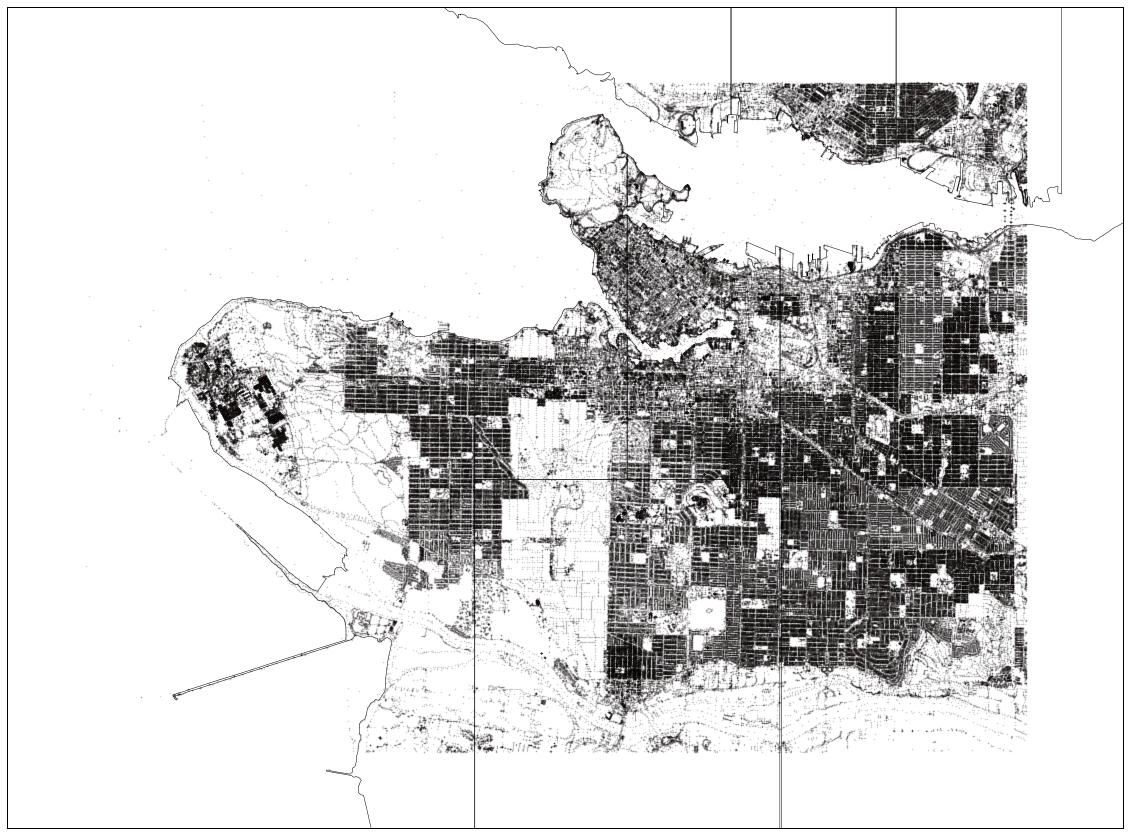

In [52]:
draw_map(all_x,all_y)

### Mapping with Top 3 users node Information

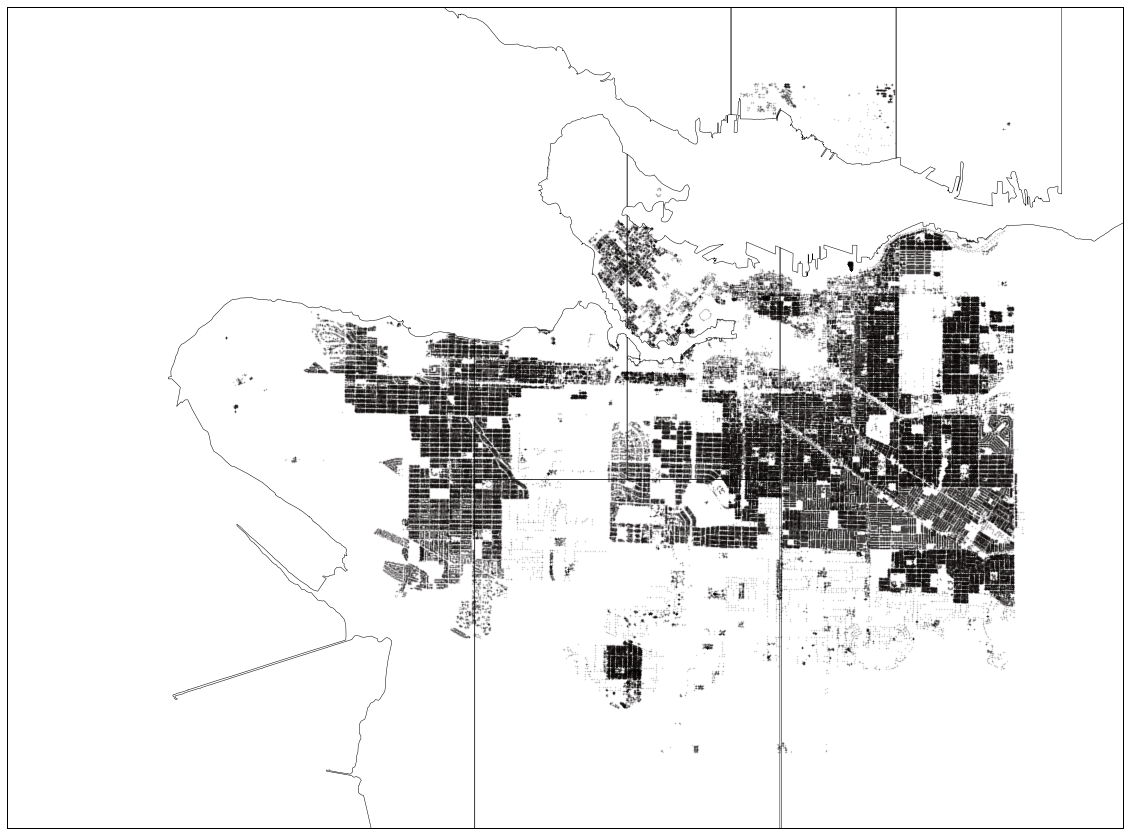

In [53]:
draw_map(top_x,top_y)

***By visualizing, I can figure out how much they contributed. Most of information were contributed from top 3 users.***


# Additional Ideas

Open street map data was cleaner and has a lot of data than i thought But there should be limits, if place is countryside. 
Someday, self driving car will be go around cities and they will give us huge data to contribute open street map project, because it has a lot of sensor which can get data. We need to use that data to fill in this open street map. There might be some places where people don't contribute because of some reason that people can't access or hard to get information. Self driving car will access places easily and get data which is difficult to human. Data by self driving car will be cleaner than data by human. Also, there might be data which is difficult to measure by human.
  
* benefits
    * Getting data easily where people can't access or are not interested in.
    * Data will be cleanear than data from human.
    * Can get data which is hard to be measured by human.
 
* Anticipated problems
    * It might need addtional fix.
    * Data would be too huge to manipulate.
    * Ethic problem.

Definitely, there might be problems. As i saw articles, self driving car get size 4TB data per day. It will be hard to handle this amount of data. And still need fix, because data will be collected machine which human cannot understand. 
But, these problem will be solved by us as data scientist. I've often heard this statement "Be prepare a flood of data".  
There must be ethic problem occurred by collecting data. As we know Google street view has suffured these problem, ethic problem must be prepared. I don't want my information to be exposed.  This problem looks difficult to be solved.


# Conclusion 

A map gives us information where we are and how to get specific place which is main a purpose of a map. By analyzing cleaned data, we was able to get some hidden information in the map data which makes data analyst interested and be curious. Just by looking map we won't be able to know how many restaurant, religions and which building is highest.I think a map will be continuesly getting better and give us geological information as well as addtional information.   
To get additional information, analysis of cleaned and diverse data is necessary.

### [Jump to the Top of page](#top)